In [1]:
import requests
from bs4 import BeautifulSoup
import re
import json

def get_stock_advice(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        middle_section = soup.find('div', {'class': 'middle_section'})
        data = []
        if middle_section:
            news_list = middle_section.find('ul', {'class': 'news_list'})
            if news_list:
                articles = news_list.find_all('li')
                for article in articles:
                    stock_info = article.find('div', {'class': 'rb_gd14'})
                    stock_name_link = stock_info.find('a')
                    stock_name = stock_name_link.get_text(strip=True)
                    stock_price = stock_info.find_all('strong')[1].get_text(strip=True).replace(',', '')
                    try:
                        stock_price_float = float(stock_price)
                    except ValueError:
                        stock_price_float = 0.0
                    article_link = article.find('div', {'class': 'MT5'}).find('a')
                    recommendation = article_link.get_text(strip=True)
                    recommendation_parts = recommendation.split(':')
                    if len(recommendation_parts) > 1:
                        recommendation_trimmed = recommendation_parts[0].split(';')[0].strip()
                        source = recommendation_parts[-1].strip()
                    else:
                        recommendation_trimmed = recommendation
                        source = ''
                    match = re.search(r'target of Rs (\d+[:,]?\d+)', recommendation)
                    if match:
                        target_value = match.group(1).replace(',', '')
                        try:
                            target_value_float = float(target_value)
                        except ValueError:
                            target_value_float = 0.0
                    else:
                        target_value = ''
                        target_value_float = 0.0
                    revenue = target_value_float - stock_price_float
                    if stock_price_float != 0:
                        profit_percent = (revenue / stock_price_float) * 100
                    else:
                        profit_percent = 0.0
                    data.append({
                        'Stock Name': stock_name,
                        'Price': f'Rs {stock_price}',
                        'Recommendation': recommendation_trimmed,
                        'Target Price': target_value,
                        'Source': source,
                        'Revenue': f'Rs {revenue:.2f}',
                        'Profit Percent': f'{profit_percent:.2f}%'
                    })
            else:
                return {'error': 'No news list found on the page.'}
        else:
            return {'error': 'No middle section found on the page.'}
    else:
        return {'error': 'Failed to retrieve the webpage.'}
    return data

url = 'https://m.moneycontrol.com/markets/stock-advice/'
all_recommended_stocks = get_stock_advice(url)
print(json.dumps(all_recommended_stocks, indent=4))


[
    {
        "Stock Name": "HDFC Bank",
        "Price": "Rs 1530.50",
        "Recommendation": "Buy HDFC Bank",
        "Target Price": "1850",
        "Source": "ICICI Securities",
        "Revenue": "Rs 319.50",
        "Profit Percent": "20.88%"
    },
    {
        "Stock Name": "Tejas Networks",
        "Price": "Rs 1174.20",
        "Recommendation": "Buy Tejas Networks",
        "Target Price": "1100",
        "Source": "Emkay Global Financial",
        "Revenue": "Rs -74.20",
        "Profit Percent": "-6.32%"
    },
    {
        "Stock Name": "Bajaj Finance",
        "Price": "Rs 6873.05",
        "Recommendation": "Buy Bajaj Finance",
        "Target Price": "9000",
        "Source": "Emkay Global Financial",
        "Revenue": "Rs 2126.95",
        "Profit Percent": "30.95%"
    },
    {
        "Stock Name": "Bajaj Finance",
        "Price": "Rs 6873.05",
        "Recommendation": "Buy Bajaj Finance",
        "Target Price": "9000",
        "Source": "Emkay Global Fin

In [2]:
from yahooquery import search
import time

def get_ticker_symbol_yahoo(company_name, retries=5, delay=1):
    for attempt in range(retries):
        try:
            response = search(company_name)
            if 'quotes' in response and response['quotes']:
                symbol = response['quotes'][0]['symbol']
                print(f"Found symbol for {company_name}: {symbol}")
                return symbol
            else:
                print(f"No results found for {company_name}. Response: {response}")
        except Exception as e:
            print(f"Exception fetching data for {company_name}: {e}")
        time.sleep(delay)
    print(f"Failed to get ticker for {company_name} after {retries} attempts")
    return None



tickers = []
for stock in all_recommended_stocks:
    ticker = get_ticker_symbol_yahoo(stock['Stock Name'])
    if ticker:
        tickers.append(ticker)
    time.sleep(1)  # Sleep to avoid rate limiting

tickers = list(filter(None, tickers))  # Remove None values
print(tickers)


Found symbol for HDFC Bank: HDB
Found symbol for Tejas Networks: TEJASNET.NS
Found symbol for Bajaj Finance: BAJFINANCE.NS
Found symbol for Bajaj Finance: BAJFINANCE.NS
Found symbol for Persistent: PERSISTENT.NS
Found symbol for Aditya Birla F: ABFRL.NS
Found symbol for Wipro: WIT
Found symbol for HDFC Life: HDFCLIFE.NS
Found symbol for Patel Eng: PATELENG.BO
Found symbol for Infosys: INFY
Found symbol for Jindal Drilling: JINDRILL.BO
Found symbol for Navneet: NAVNETEDUL.BO
Found symbol for INDUS TOWERS: INDUSTOWER.BO
Found symbol for City Union Bank: CUB.BO
Found symbol for Hatsun Agro: HATSUN.NS
Found symbol for Guj State Petro: GSPL.BO
Found symbol for Adani Ports: ADANIPORTS.NS
Found symbol for Aditya Birla F: ABFRL.NS
Found symbol for Persistent: PERSISTENT.NS
Found symbol for HDFC Life: HDFCLIFE.NS
Found symbol for Bajaj Auto: BAJAJ-AUTO.BO
Found symbol for Bajaj Auto: BAJAJ-AUTO.BO
Found symbol for HDFC Bank: HDB
Found symbol for Infosys: INFY
Found symbol for Guj State Petro: G

In [3]:
tickers

['HDB',
 'TEJASNET.NS',
 'BAJFINANCE.NS',
 'BAJFINANCE.NS',
 'PERSISTENT.NS',
 'ABFRL.NS',
 'WIT',
 'HDFCLIFE.NS',
 'PATELENG.BO',
 'INFY',
 'JINDRILL.BO',
 'NAVNETEDUL.BO',
 'INDUSTOWER.BO',
 'CUB.BO',
 'HATSUN.NS',
 'GSPL.BO',
 'ADANIPORTS.NS',
 'ABFRL.NS',
 'PERSISTENT.NS',
 'HDFCLIFE.NS',
 'BAJAJ-AUTO.BO',
 'BAJAJ-AUTO.BO',
 'HDB',
 'INFY',
 'GSPL.BO']

In [53]:
import yfinance as yf
import pandas as pd

def fetch_stock_data(stocks, period='10y'):
    stock_data = {}
    for stock in stocks:
        try:
            print(f"Fetching data for {stock}...")
            ticker = yf.Ticker(stock)
            stock_history = ticker.history(period=period)
            if not stock_history.empty:
                stock_data[stock] = stock_history
                print(f"Data for {stock}: {stock_history.head()}")
            else:
                print(f"{stock}: No data found, symbol may be delisted or incorrectly formatted")
        except Exception as e:
            print(f"{stock}: Error fetching data - {e}")
    return stock_data

stock_data = fetch_stock_data(tickers)
print(stock_data)


Fetching data for HDB...
Data for HDB:                                 Open       High        Low      Close  \
Date                                                                    
2014-05-28 00:00:00-04:00  21.604651  21.623412  21.229406  21.473314   
2014-05-29 00:00:00-04:00  21.435790  21.628103  21.337289  21.524910   
2014-05-30 00:00:00-04:00  21.299766  21.365433  21.032405  21.121525   
2014-06-02 00:00:00-04:00  21.524911  22.162825  21.524911  22.111229   
2014-06-03 00:00:00-04:00  22.040872  22.275399  21.965824  22.134682   

                            Volume  Dividends  Stock Splits  
Date                                                         
2014-05-28 00:00:00-04:00  2588600        0.0           0.0  
2014-05-29 00:00:00-04:00  3297400        0.0           0.0  
2014-05-30 00:00:00-04:00  9023200        0.0           0.0  
2014-06-02 00:00:00-04:00  2713200        0.0           0.0  
2014-06-03 00:00:00-04:00  2361400        0.0           0.0  
Fetching data f

In [54]:
import numpy as np

def calculate_metrics(stock_data):
    metrics = {}
    for stock, data in stock_data.items():
        data['Return'] = data['Close'].pct_change()
        volatility = data['Return'].std() * np.sqrt(252 / len(data))
        avg_return = data['Return'].mean() * 252 / len(data)
        metrics[stock] = {'Volatility': volatility, 'Avg_Return': avg_return}
    return metrics

metrics = calculate_metrics(stock_data)
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


               Volatility  Avg_Return
HDB              0.005764    0.000056
TEJASNET.NS      0.013305    0.000217
BAJFINANCE.NS    0.007407    0.000177
PERSISTENT.NS    0.006815    0.000143
ABFRL.NS         0.008178    0.000067
WIT              0.005577    0.000016
HDFCLIFE.NS      0.007664    0.000082
PATELENG.BO      0.011819    0.000049
INFY             0.005476    0.000065
JINDRILL.BO      0.010491    0.000094
NAVNETEDUL.BO    0.006929    0.000057
INDUSTOWER.BO    0.008394    0.000057
CUB.BO           0.006461    0.000063
HATSUN.NS        0.006842    0.000116
GSPL.BO          0.006774    0.000083
ADANIPORTS.NS    0.007640    0.000108
BAJAJ-AUTO.BO    0.005106    0.000083


In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
metrics_df['Risk_Level'] = kmeans.fit_predict(metrics_df[['Volatility', 'Avg_Return']])

risk_mapping = {0: "low", 1: "mid", 2: "high"}
metrics_df['Risk_Level'] = metrics_df['Risk_Level'].map(risk_mapping)
print(metrics_df)


                 Volatility  Avg_Return Risk_Level
HDFC Bank          0.005764    0.000056       high
Tejas Networks     0.013305    0.000217        low
Bajaj Finance      0.007407    0.000177        mid
Persistent         0.006815    0.000143        mid
Aditya Birla F     0.008178    0.000067        mid
Wipro              0.005577    0.000016       high
HDFC Life          0.007664    0.000082        mid
Patel Eng          0.011819    0.000049        low
Infosys            0.005476    0.000065       high
Jindal Drilling    0.010491    0.000094        low
Navneet            0.006929    0.000057        mid
INDUS TOWERS       0.008394    0.000057        mid
City Union Bank    0.006461    0.000063        mid
Hatsun Agro        0.006842    0.000116        mid
Guj State Petro    0.006774    0.000083        mid
Adani Ports        0.007640    0.000108        mid
Bajaj Auto         0.005106    0.000083       high


In [62]:
ticker_dict = {
    "HDB": "HDFC Bank",
    "TEJASNET.NS": "Tejas Networks",
    "BAJFINANCE.NS": "Bajaj Finance",
    "PERSISTENT.NS": "Persistent",
    "ABFRL.NS": "Aditya Birla F",
    "WIT": "Wipro",
    "HDFCLIFE.NS": "HDFC Life",
    "PATELENG.BO": "Patel Eng",
    "INFY": "Infosys",
    "JINDRILL.BO": "Jindal Drilling",
    "NAVNETEDUL.BO": "Navneet",
    "INDUSTOWER.BO": "INDUS TOWERS",
    "CUB.BO": "City Union Bank",
    "HATSUN.NS": "Hatsun Agro",
    "GSPL.BO": "Guj State Petro",
    "ADANIPORTS.NS": "Adani Ports",
    "BAJAJ-AUTO.BO": "Bajaj Auto"
}


print(ticker_dict)


{'HDB': 'HDFC Bank', 'TEJASNET.NS': 'Tejas Networks', 'BAJFINANCE.NS': 'Bajaj Finance', 'PERSISTENT.NS': 'Persistent', 'ABFRL.NS': 'Aditya Birla F', 'WIT': 'Wipro', 'HDFCLIFE.NS': 'HDFC Life', 'PATELENG.BO': 'Patel Eng', 'INFY': 'Infosys', 'JINDRILL.BO': 'Jindal Drilling', 'NAVNETEDUL.BO': 'Navneet', 'INDUSTOWER.BO': 'INDUS TOWERS', 'CUB.BO': 'City Union Bank', 'HATSUN.NS': 'Hatsun Agro', 'GSPL.BO': 'Guj State Petro', 'ADANIPORTS.NS': 'Adani Ports', 'BAJAJ-AUTO.BO': 'Bajaj Auto'}


In [63]:
metrics_df.rename(index=ticker_dict, inplace=True)
metrics_df

,Volatility,Avg_Return,Risk_Level
HDFC Bank,0.005764,0.000056,high
Tejas Networks,0.013305,0.000217,low
Bajaj Finance,0.007407,0.000177,mid
Persistent,0.006815,0.000143,mid
Aditya Birla F,0.008178,0.000067,mid
Wipro,0.005577,0.000016,high
HDFC Life,0.007664,0.000082,mid
Patel Eng,0.011819,0.000049,low
Infosys,0.005476,0.000065,high
Jindal Drilling,0.010491,0.000094,low


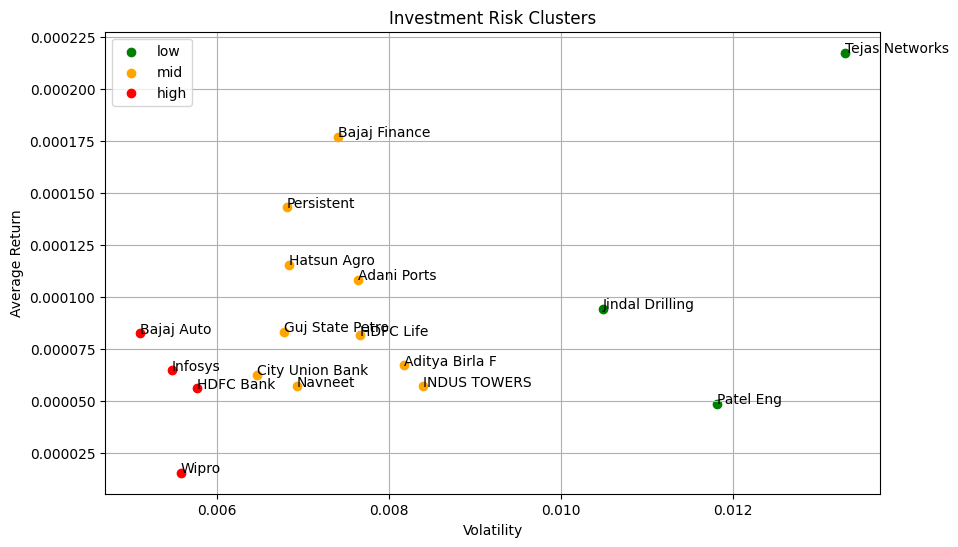

In [67]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Define color map
color_map = {'low': 'green', 'mid': 'orange', 'high': 'red'}

# Plot each risk level with different color and add labels
for risk_level, color in color_map.items():
    subset = metrics_df[metrics_df['Risk_Level'] == risk_level]
    plt.scatter(subset['Volatility'], subset['Avg_Return'], color=color, label=risk_level)
    for i, row in subset.iterrows():
        plt.text(row['Volatility'], row['Avg_Return'], i)

# Add labels and title
plt.xlabel('Volatility')
plt.ylabel('Average Return')
plt.title('Investment Risk Clusters')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [64]:
def generate_recommendations(recommendations, metrics_df):
    clusters = {'low': [], 'mid': [], 'high': []}
    
    for stock in recommendations:
        stock_name = stock['Stock Name']
        target_price = stock['Target Price']
        recommendation = stock['Recommendation']
        risk_level = metrics_df.loc[stock_name, 'Risk_Level']
        
        clusters[risk_level].append({
            'Stock': stock_name,
            'Investment': stock['Price'],
            'Target_Price': target_price,
            'Recommendation': recommendation
        })
    
    return clusters

clusters = generate_recommendations(all_recommended_stocks, metrics_df)
for risk_level, stocks in clusters.items():
    print(f"{risk_level.capitalize()} Risk Stocks:")
    for stock in stocks:
        print(f"Buy {stock['Stock']} at {stock['Investment']} and sell at {stock['Target_Price']} - {stock['Recommendation']}")
    print()


Low Risk Stocks:
Buy Tejas Networks at Rs 1174.20 and sell at 1100 - Buy Tejas Networks
Buy Patel Eng at Rs 59.45 and sell at 80 - Buy Patel Engineering
Buy Jindal Drilling at Rs 678.80 and sell at 960 - Buy Jindal Drilling and Industries

Mid Risk Stocks:
Buy Bajaj Finance at Rs 6873.05 and sell at 9000 - Buy Bajaj Finance
Buy Bajaj Finance at Rs 6873.05 and sell at 9000 - Buy Bajaj Finance
Buy Persistent at Rs 3690.65 and sell at 3700 - Reduce Persistent Systems
Buy Aditya Birla F at Rs 285.75 and sell at 230 - Reduce Aditya Birla Fashion and Retail
Buy HDFC Life at Rs 578.45 and sell at 739 - Buy HDFC Life Insurance Company
Buy Navneet at Rs 150.90 and sell at 182 - Buy Navneet Education
Buy INDUS TOWERS at Rs 341.40 and sell at 260 - Sell Indus Tower
Buy City Union Bank at Rs 144.20 and sell at 170 - Buy City Union Bank
Buy Hatsun Agro at Rs 1119.75 and sell at 1190 - Buy Hatsun Agro Products
Buy Guj State Petro at Rs 291.75 and sell at 355 - Buy Gujarat State Petronet
Buy Adani Po

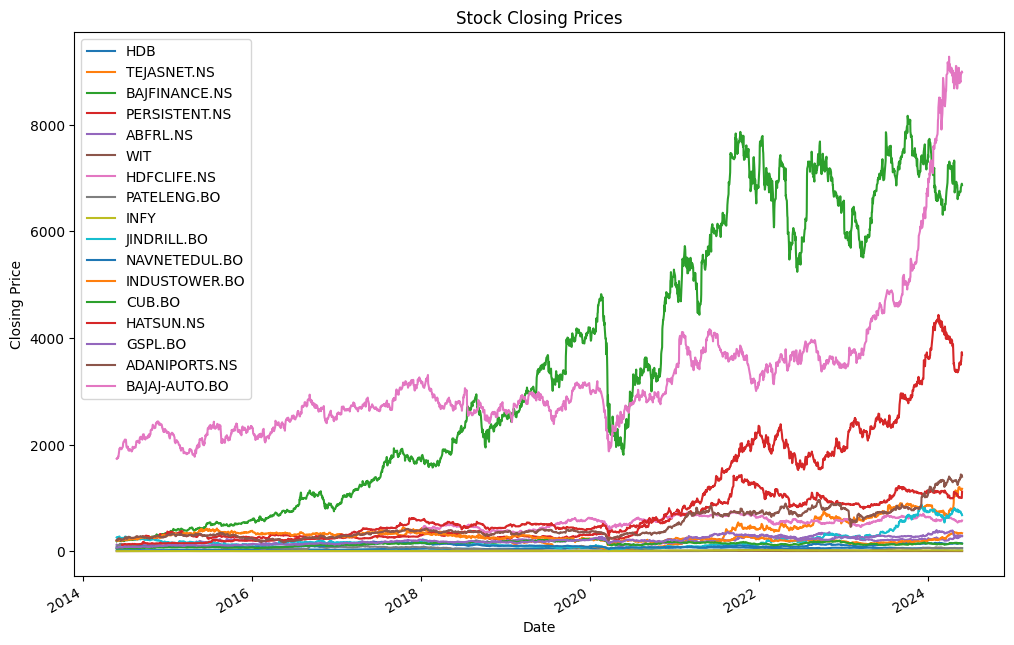

In [65]:
import matplotlib.pyplot as plt

def plot_stock_data(stock_data):
    plt.figure(figsize=(12, 8))
    for stock, data in stock_data.items():
        data['Close'].plot(label=stock)
    plt.title('Stock Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

plot_stock_data(stock_data)